## *Commands*
1. Importe o dataset
2. Separe os dados de treino e treine
3. Aplique o One-Hot Encolding nas variáveis categóricas
4. Aplique a padronização dos dados StandardScaler
5. receba entradas dos usuários fazendo perguntas sobre cada features indicando o tipo de resposta(0 a 10)
6. Treine com todos os kernels e valores diferentes de C
7. Compare os resultados automaticamente
8. Responda ao usuário se ele terá ou não um segundo encontro


# Inputs

In [305]:
# install
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [306]:
db = pd.read_csv("base_segundo_encontro.csv", encoding="latin1", sep=";")
db

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [307]:
def inputs():
    db.columns


In [308]:
# db.describe()
# db.isnull().sum()
db.columns

Index(['tempo_conversa_min', 'risadas', 'pontos_comuns', 'nivel_timidez',
       'mensagens_antes', 'iniciativa_conversa', 'local_encontro',
       'momento_da_vida', 'segundo_encontro'],
      dtype='object')

<Axes: xlabel='segundo_encontro', ylabel='count'>

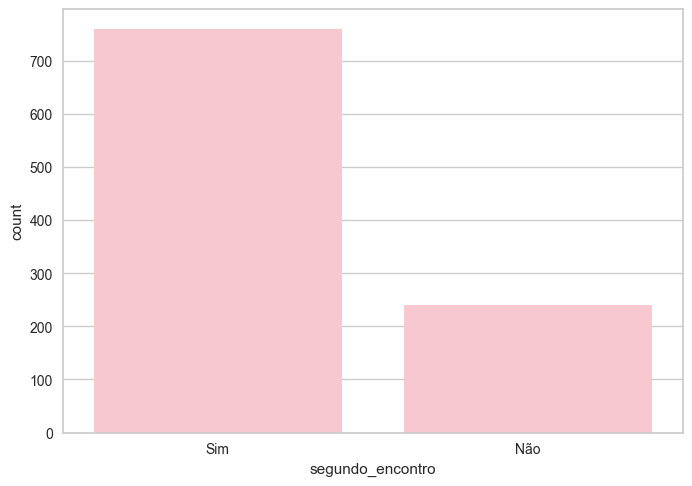

In [309]:
sns.countplot(x=db['segundo_encontro'], color="pink")

In [310]:
x = db.iloc[:, 0:8].values
y = db.iloc[:, 8].values

## One-Hot Encoder

In [311]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_encoder_features = ColumnTransformer(transformers=[
    ('OneHot1', OneHotEncoder(), [6]),
    ('OneHot2', OneHotEncoder(), [7])],
     
      remainder='passthrough')

onehot_encoder_target = OneHotEncoder()

In [312]:
x = onehot_encoder_features.fit_transform(x)
x[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 112, 16, 6, 0, 45, 8],
      dtype=object)

In [313]:
y[0]

'Sim'

In [314]:
x.shape, y.shape

((1000, 13), (1000,))

In [315]:
from sklearn.preprocessing import StandardScaler

scaler_date = StandardScaler(with_mean=False)
x = scaler_date.fit_transform(x)
x[0]


array([0.        , 0.        , 0.        , 2.25509671, 0.        ,
       2.1007708 , 0.        , 2.74186666, 2.82071876, 1.94214029,
       0.        , 3.13861033, 2.54707897])

In [316]:
from sklearn.model_selection import train_test_split

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)


In [317]:
x_training.shape, x_test.shape

((800, 13), (200, 13))

In [318]:
y_training.shape, y_test.shape

((800,), (200,))

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C= 1.0)
svm.fit(x_training, y_training)
# linear score : 99.5%

# svm = SVC(kernel='rbf', C= 1.0)
# svm.fit(x_training, y_training)
# rbf score: 96%

# svm = SVC(kernel='sigmoid', C= 1.0)
# svm.fit(x_training, y_training)
#sigmoid score: 64.5%

# svm = SVC(kernel='poly', C= 1.0)
# svm.fit(x_training, y_training)
# poly score: 98%

SVC(kernel='linear')

In [320]:
from scipy.sparse import issparse
print(issparse(x_training))
print(issparse(y_training))

False
False


In [321]:
prevision = svm.predict(x_test)
prevision

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [322]:
y_test

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [323]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, prevision)

0.995

0.995

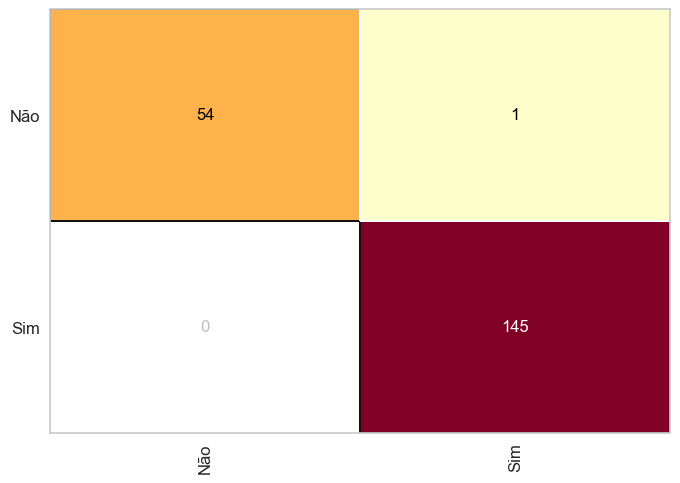

In [324]:
from yellowbrick.classifier import ConfusionMatrix

plt.Figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_training, y_training)
cm.score(x_test, y_test)

In [338]:
k_value = [0.1, 1, 1.2, 10]
kernels = ['linear','rbf', 'sigmoid', 'poly']

best_score = 0
best_kernel = None
best_C = 0

for i in kernels:
    for j in k_value:
        svm = SVC(kernel=i, C= j)
        svm.fit(x_training, y_training)
        prevision = svm.predict(x_test)
        score = accuracy_score(y_test, prevision)
        print(f"\nkernel: {i} C: {j} score: { score * 100}%")

        if score > best_score:
            best_score = score
            best_kernel = i
            best_C = j



kernel: linear C: 0.1 score: 98.0%

kernel: linear C: 1 score: 99.5%

kernel: linear C: 1.2 score: 99.5%

kernel: linear C: 10 score: 99.5%

kernel: rbf C: 0.1 score: 75.5%

kernel: rbf C: 1 score: 96.0%

kernel: rbf C: 1.2 score: 96.0%

kernel: rbf C: 10 score: 96.0%

kernel: sigmoid C: 0.1 score: 71.0%

kernel: sigmoid C: 1 score: 64.5%

kernel: sigmoid C: 1.2 score: 65.0%

kernel: sigmoid C: 10 score: 64.0%

kernel: poly C: 0.1 score: 96.5%

kernel: poly C: 1 score: 98.0%

kernel: poly C: 1.2 score: 97.5%

kernel: poly C: 10 score: 98.0%


In [339]:
print(f"\nBest Score: {best_score * 100}% \nBest Kernel:{best_kernel}\nBest C:{best_C}")


Best Score: 99.5% 
Best Kernel:linear
Best C:1
